In [18]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

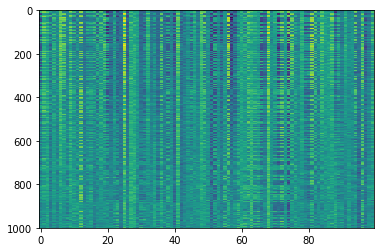

In [19]:
m, n, n_clusters = 1000, 100, 2

true_centroids0 = np.random.randn(n_clusters, n)
true_centroids1 = true_centroids0 + (2.0 * np.random.randn(n_clusters, n))
true_assignments = np.empty(m).astype('int')

data = np.empty((m, n))
for t, alpha in enumerate(np.linspace(0, 1, m)):
    c = np.random.choice(n_clusters)
    true_assignments[t] = c
    tc0 = alpha * true_centroids0[c]
    data[t] = (
        alpha * true_centroids0[c] + 
        (1 - alpha) * true_centroids1[c]
    )

data += 0.5 * np.random.randn(m, n)

plt.imshow(data, aspect='auto', interpolation='none')

In [20]:
from lvl.factor_models import _NonstationarySoftKMeans
model = _NonstationarySoftKMeans(n_components=2, smoothness=1.0, temperature=1.0)
model.fit(data)

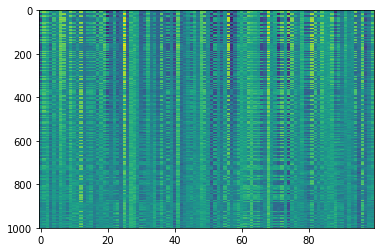

In [21]:
plt.imshow(model.predict(), aspect='auto', interpolation='none')

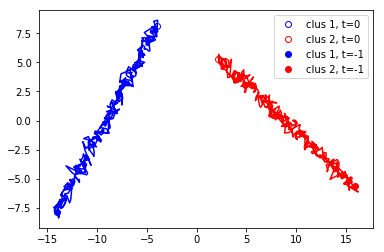

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcent = pca.fit_transform(
    np.row_stack((true_centroids0, true_centroids1)))

colors = ("blue", "red")
for c, (x0, y0) in zip(colors, pcent[:n_clusters]):
    plt.plot(x0, y0, 'o', color=c, mfc='w')

for c, (x0, y0) in zip(colors, pcent[n_clusters:]):
    plt.plot(x0, y0, 'o', color=c)

Z = pca.transform(
    model._factors[1].reshape((-1, n))).reshape((m, n_clusters, 2))
Z = pca.transform(model.predict())
plt.plot(
    Z[true_assignments == 0][:, 0],
    Z[true_assignments == 0][:, 1], color=colors[0]
)
plt.plot(
    Z[true_assignments == 1][:, 0],
    Z[true_assignments == 1][:, 1], color=colors[1]
)

# Z = pca.transform(data)
# plt.plot(
#     Z[true_assignments == 0][:, 0],
#     Z[true_assignments == 0][:, 1], color='k'
# )

# plt.plot(
#     Z[true_assignments == 1][:, 0],
#     Z[true_assignments == 1][:, 1], color='k'
# )

plt.legend((
    "clus 1, t=0",
    "clus 2, t=0",
    "clus 1, t=-1",
    "clus 2, t=-1",
), bbox_to_anchor=(1, 1))

In [ ]:
plt.plot(np.cumsum(PCA().fit(data).explained_variance_ratio_), '.-')
plt.xlim(-1, 10)

In [ ]:
plt.plot(model.factors[0])
plt.xlim(0, 10)